## Collect samples

In [1]:
#build the list of selection tasks
from snippets.sample_definitions import _samples_Run2,collectAvailableSampleDirectories
from snippets.sample_helpers import collectFileInputs
from snippets.ewvjj_preselection_helpers import *

input_dir='/eos/cms/store/cmst3/group/top/SMP-19-005/july20'

#MC
samples_dir_list = collectAvailableSampleDirectories(input_dir,
                                                     ['gjetslo', 'ewgjjhw','ewgjjpy8','qcd','ggjets'],
                                                     _samples_Run2)
samples_list = collectFileInputs(samples_dir_list)
print('I have collected a total of {} MC tasks'.format(len(samples_list)))
print(list(samples_list.keys()))

#data
data_samples_dir_list = collectAvailableSampleDirectories(input_dir,['data'],_samples_Run2)
data_samples_list = collectFileInputs(data_samples_dir_list)
print('I have collected a total of {} data tasks'.format(len(data_samples_list)))
print(list(data_samples_list.keys()))

Welcome to JupyROOT 6.22/06
I have collected a total of 48 MC tasks
['crab_DiPhotonJetsBox_M40_80-Sherpa_2016_v1', 'crab_DiPhotonJetsBox_M40_80-Sherpa_2017_v1', 'crab_DiPhotonJetsBox_M40_80-Sherpa_2018_v1', 'crab_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2016_v1', 'crab_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2017_v1', 'crab_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2018_v1', 'crab_GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8_2017_pmx_v1', 'crab_GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8_2018_v1', 'crab_GJets_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_2016_ext1_v1', 'crab_GJets_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_2016_v1', 'crab_GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_2017_pmx_v1', 'crab_GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_2018_v1', 'crab_GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_2016_ext1_v1', 'crab_GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_2016_v1', 'crab_GJets_HT-400To600_TuneCP5_13TeV-ma

## Test procedure on single file

In [2]:
sample='crab_GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_2016_v1'
isData=False

test_dir='/eos/user/p/psilva/data/ewk-vjj/test'
os.system('mkdir -p {}/Chunks'.format(test_dir))

kwargs={'era':sample,
        'isData':isData,
        'force':True,
        'handle':defineV1JSelectionAndBranches,
        'local':False,
        'files':samples_list[sample][0:1],
        'outdir':test_dir}
runEWVJJSelectionTask(kwargs)

#print some basic information
print('Processed',kwargs['files'])
rdf=ROOT.RDataFrame('data','{}/Chunks/{}.root'.format(test_dir,sample))
print('Events total {} '.format(rdf.Count().GetValue()))
all_cols=rdf.GetColumnNames()
print('Branches are',all_cols)

cols = ROOT.vector('string')()
for b in ['pt','phi','ptj','phij','passPF','passPU','g_ptj','g_phij'] : cols.push_back(b)
display=rdf.Display( cols )
display.Print()

Processed ['/eos/cms/store/cmst3/group/top/SMP-19-005/july20/GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/crab_GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_2016_v1/200708_175153/0000/out_1.root']
Events total 8147 
Branches are { "PV_npvsGood", "fixedGridRhoFastjetAll", "weight", "pt", "eta", "phi", "ptj", "phij", "etaj", "mj", "passPF", "passPU", "g_ptj", "g_etaj", "g_phij", "g_mj" }
pt       | phi        | ptj      | phij      | passPF | passPU | g_ptj     | g_phij     | 
260.630f | -0.162872f | 267.500f | 3.09717f  | 1      | 1      | 266.21729 | 3.0898438  | 
61.7238f | -0.373901f | 118.438f | 2.64893f  | 1      | 1      | 114.11539 | 2.6289062  | 
354.811f | 0.997070f  | 392.250f | -2.16406f | 1      | 1      | 366.60645 | -2.1611328 | 
210.059f | -2.96924f  | 125.688f | 0.217712f | 1      | 1      | 122.24754 | 0.22122192 | 
64.0255f | -1.80835f  | 119.000f | 1.20435f  | 1      | 1      | 127.64935 | 1.2160645  | 


Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


## Run over all samples

This step takes approx. 1.4h for the full Run2 data and MC.
It can be skipped if the snapshots are already available.

In [3]:
import time
t0 = time.time()

out_dir='/eos/user/p/psilva/data/ewk-vjj/v1j'
os.system('mkdir -p {}/Chunks'.format(out_dir))
os.system('rm -f {}/Chunks/*.root'.format(out_dir))

base_args={'force':True, 
           'handle':defineV1JSelectionAndBranches,
           'local':False,
           'isData':False,
           'outdir':out_dir}
runEWVJJSelectionTaskList(samples_list,base_args)

base_args['isData']=True
runEWVJJSelectionTaskList(data_samples_list,base_args)

tf = time.time()
print('Execution time {:3.2f}h'.format((tf-t0)/(60**2)))

Execution time 1.32h


In [4]:
t0=time.time()

#merge snapshots
from snippets.sample_helpers import mergeSnapshotChunksToDataFrames
mergeSnapshotChunksToDataFrames(out_dir+'/Chunks',out_dir+'/Merged',convertToPandas=False)

#compute normalization cache
from snippets.sample_helpers import produceNormalizationCache
produceNormalizationCache(samples_list,out_dir)
print('Normalization cache available in {}/norm_cache.pck'.format(out_dir))

tf = time.time()
print('Execution time {:3.2f}h'.format((tf-t0)/(60**2)))

I have identified 67 samples to merge
Merging .sys.v#.crab_GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_2018_v1 from 1 chunks
Merging .sys.v#.crab_QCD_Pt-80to120_EMEnriched_TuneCUETP8M1_13TeV_pythia8_2016_v1 from 1 chunks
Merging crab_DiPhotonJetsBox_M40_80-Sherpa_2016_v1 from 20 chunks
Merging crab_DiPhotonJetsBox_M40_80-Sherpa_2017_v1 from 20 chunks
Merging crab_DiPhotonJetsBox_M40_80-Sherpa_2018_v1 from 20 chunks
Merging crab_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2016_v1 from 20 chunks
Merging crab_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2017_v1 from 20 chunks
Merging crab_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2018_v1 from 20 chunks
Merging crab_EGamma_2018_A_v1 from 20 chunks
Merging crab_EGamma_2018_B_v1 from 20 chunks
Merging crab_EGamma_2018_C_v1 from 20 chunks
Merging crab_EGamma_2018_D_v1 from 20 chunks
Merging crab_GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8_2017_pmx_v1 from 20 chunks
Merging crab_GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8_2018_

Error in <TFile::TFile>: file /eos/user/p/psilva/data/ewk-vjj/v1j/Chunks/.sys.v does not exist
Error in <TFileMerger::AddFile>: cannot open file /eos/user/p/psilva/data/ewk-vjj/v1j/Chunks/.sys.v#.crab_GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_2018_v1_0_933142.root
hadd skipping file with error: /eos/user/p/psilva/data/ewk-vjj/v1j/Chunks/.sys.v#.crab_GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_2018_v1_0_933142.root
Error in <TFile::TFile>: file /eos/user/p/psilva/data/ewk-vjj/v1j/Chunks/.sys.v does not exist
Error in <TFileMerger::AddFile>: cannot open file /eos/user/p/psilva/data/ewk-vjj/v1j/Chunks/.sys.v#.crab_QCD_Pt-80to120_EMEnriched_TuneCUETP8M1_13TeV_pythia8_2016_v1_363836_1488419.root
hadd skipping file with error: /eos/user/p/psilva/data/ewk-vjj/v1j/Chunks/.sys.v#.crab_QCD_Pt-80to120_EMEnriched_TuneCUETP8M1_13TeV_pythia8_2016_v1_363836_1488419.root
Warning in <ROOT_TImplicitMT_DisableImplicitMT>: Implicit multi-threading is already disabled


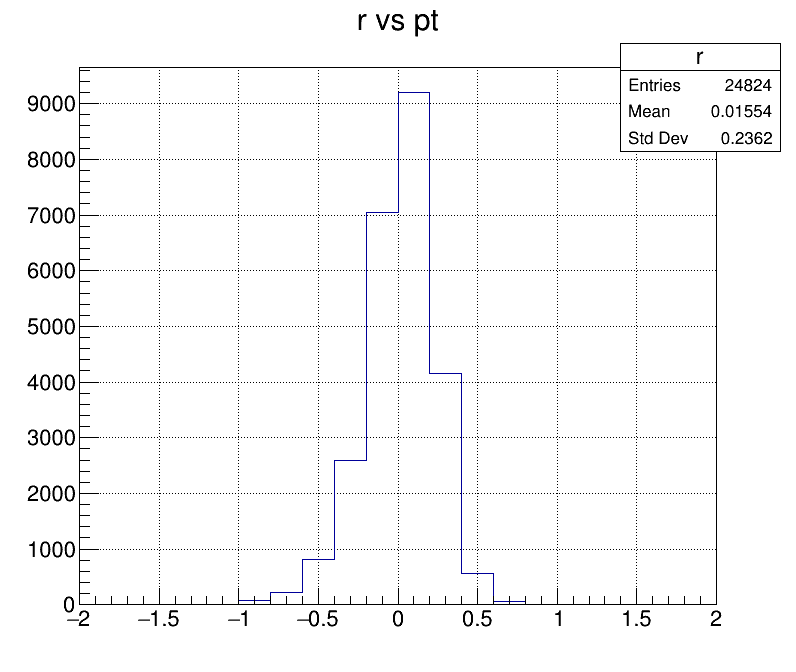

In [50]:
rdf=ROOT.RDataFrame('data','/eos/user/p/psilva/data/ewk-vjj/v1j/Merged/crab_EGamma_2018_A_v1.root')
h = rdf.Filter('pt>80 && ptj>80').Define('r','1+(ptj/pt)*cos(phi-phij)').Histo1D(("r", "r vs pt",20, -2,2), 'r')  
#Histo2D(("r", "r vs pt",100,50,200, 100, -1,1), "pt","r")
 
c=ROOT.TCanvas("c", "", 800, 700)
h.DrawClone("colz")
c.SetGridx()
c.SetGridy()
c.Draw()